# Step 1: Business Understanding

## Objective

Syriatel is a telecommunications company experiencing a growing concern over customer churn, which refers to the loss of clients or subscribers. The goal of this project is to build a machine learning model that accurately predicts whether a customer is likely to churn based on their behavior and service usage history.

By identifying high-risk customers early, Syriatel can implement proactive retention strategies, such as targeted offers, discounts, or personalized support.

## Problem Statement

Customer churn has a direct impact on company revenue and growth. Acquiring a new customer is often more expensive than retaining an existing one. Syriatel seeks to leverage historical customer data to develop a predictive model that classifies customers into two categories:

- **Churn = True**: Customers who are likely to leave the service.
- **Churn = False**: Customers who are expected to stay.

## Goals

- Understand the factors that contribute to customer churn.
- Build a reliable classification model using historical customer data.
- Provide actionable insights and recommendations to reduce churn rates.
- Deploy the model in a way that integrates with Syriatel’s customer relationship management (CRM) systems for real-time retention action.

## Success Criteria

- A trained model with acceptable classification performance (e.g., accuracy, precision, recall).
- A clean, reproducible notebook that explains each step clearly.
- Data preprocessed using pipelines to prevent leakage and ensure future scalability.
- A summary of the top churn indicators to assist business teams in retention strategy.


# Step 2: Data Understanding

Understanding the structure, quality, and content of the data is essential before building any predictive model. This step involves reviewing the dataset's shape, data types, missing values, and summary statistics. The insights gathered here will inform decisions during data preparation and feature engineering.

### Dataset Overview

The dataset contains historical records of Syriatel customers, including usage patterns, service subscriptions, and whether or not the customer has churned (target variable: `Churn`).

### Key Tasks:
- Load the dataset and examine its structure.
- Check for missing values and inconsistent data types.
- Identify categorical vs numerical features.
- Analyze class balance for the target variable (`Churn`).


### 1. Load the dataset and inspect structure


In [134]:
import pandas as pd

# Load dataset
file_path = "../data/bigml_59c28831336c6604c800002a.csv"
df = pd.read_csv(file_path)

# Show shape and column names
print("Dataset shape:", df.shape)
print("\nColumns:")
print(df.columns.tolist())


Dataset shape: (3333, 21)

Columns:
['state', 'account length', 'area code', 'phone number', 'international plan', 'voice mail plan', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls', 'churn']


 ### 2. Inspect data types and missing values

In [135]:
# Show info and check for null values
df.info()
print("\nMissing values per column:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

### 3. Class distribution of target variable

In [136]:
# Target variable distribution
print("churn class distribution:")
print(df['churn'].value_counts(normalize=True))


churn class distribution:
False    0.855086
True     0.144914
Name: churn, dtype: float64


### 4. Show first few records

In [137]:
# Preview first 5 records
df.head()


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### 5. Describe numeric features

In [138]:
# Summary statistics for numerical columns
df.describe()


,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### 6. Check for duplicate rows



In [139]:
# Check for duplicates
print("Duplicate records:", df.duplicated().sum())


Duplicate records: 0


# Findings

## Dataset Structure

The dataset consists of 3,333 customer records and 21 columns. Each row represents a single customer, and the columns contain attributes such as usage metrics, service plan subscriptions, and the target variable `churn`.

- **Rows (observations):** 3,333  
- **Columns (features):** 21  
- **Target variable:** `churn` (Boolean, where `True` indicates the customer churned)

## Data Quality

- No missing values are present in any column.
- All data types are appropriate and consistent (e.g., numerical features are floats or integers, categorical features are strings).
- There are no duplicate rows in the dataset.

## Class Distribution

- The target variable `churn` is imbalanced:
  - `False` (no churn): 85.5% of customers
  - `True` (churn): 14.5% of customers

This imbalance suggests that accuracy alone is not a suitable performance metric. Evaluation will require additional focus on precision, recall, or F1-score.

## Feature Types

- **Categorical features:** `state`, `area code`, `phone number`, `international plan`, `voice mail plan`
- **Numerical features:** Remaining columns such as `account length`, `total day minutes`, `total eve calls`, `customer service calls`, etc.

Note: `phone number` is a unique identifier and does not contribute meaningfully to prediction; it should be dropped during data preparation.

## Statistical Summary

- Features such as `total day minutes`, `total eve minutes`, and `total night minutes` have a wide range of values and may require scaling.
- Many customers have `0` voice mail messages, suggesting that the `voice mail plan` is not widely used.
- The `customer service calls` feature ranges from 0 to 9, which may capture customer dissatisfaction and could be an important predictor of churn.

## Preliminary Insights

- The dataset is clean, well-structured, and ready for detailed data preparation.
- Some columns (e.g., `phone number`) may need to be excluded.
- The imbalance in the target variable will need to be addressed during model training through appropriate techniques such as stratified splitting or class weighting.



# Step 3 : Data Preparation
This step focuses on preparing the features and target variable for machine learning, while strictly avoiding data leakage.

In [140]:
# import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

### 3.1: Drop irrelevant columns

In [141]:
# Drop the phone number column as it has no predictive value
df.drop(columns=['phone number'], inplace=True)


### 3.2: Encode target variable

In [142]:
# Convert churn from boolean to binary integer
df['churn'] = df['churn'].astype(int)


### Step 3.3: Identify feature types

In [148]:
# Define categorical and numerical features
categorical_features = ['area code', 'international plan', 'voice mail plan']
numerical_features = df.drop(columns=categorical_features + ['churn']).columns.tolist()
print("Categorical features:", categorical_features)
print("Numerical features:", numerical_features)


Categorical features: ['area code', 'international plan', 'voice mail plan']
Numerical features: ['account length', 'number vmail messages', 'customer service calls']


### Step 3.4: Split data into train and test sets

In [ ]:
# Split with stratification on target due to class imbalance
X = df.drop('churn', axis=1)
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


### 3.5 Feature Engineering

#### 1. Total Charge
Calculates the total amount charged to the customer across all time periods.
Higher total charges may be associated with dissatisfaction and potential churn.


In [ ]:
df["total_charge"] = (
    df["total day charge"]
    + df["total eve charge"]
    + df["total night charge"]
    + df["total intl charge"]
)


#### 2. Total Minutes
Sums all minutes used by the customer — a general measure of overall usage.
Very low or very high usage can be predictive of churn.


In [ ]:
df["total_minutes"] = (
    df["total day minutes"]
    + df["total eve minutes"]
    + df["total night minutes"]
    + df["total intl minutes"]
)


#### 3. Total Calls
Captures the total number of calls made — gives insight into how engaged the customer is with the service.


In [ ]:
df["total_calls"] = (
    df["total day calls"]
    + df["total eve calls"]
    + df["total night calls"]
    + df["total intl calls"]
)


#### 4. Customer Service Intensity
Ratio of customer service calls to total calls — a normalized measure of dissatisfaction.
A high ratio may indicate frustration and a high likelihood of churn.


In [ ]:
df["custserv_calls_per_total_calls"] = df["customer service calls"] / df["total_calls"].replace(0, 1)


#### 5. Has International Plan + Uses It
Creates a binary flag: 1 if the customer both has an international plan and uses it.
Helps detect whether the customer is extracting value from their plan.


In [ ]:
df["intl_plan_and_calls"] = ((df["international plan"] == "yes") & (df["total intl calls"] > 0)).astype(int)


#### 6. Cost Per Minute
Shows the average price per minute — can reflect how expensive the service feels to the customer.
High values might increase churn risk due to perceived unfair pricing.


In [ ]:
df["cost_per_minute"] = df["total_charge"] / df["total_minutes"].replace(0, 1)


### 3.6 Interaction Terms

#### 3.6.1 High Usage and Cost Burden

In [ ]:
# High usage and high cost interaction
df["high_usage_high_cost"] = (df["total_minutes"] > df["total_minutes"].median()) & (df["cost_per_minute"] > df["cost_per_minute"].median())
df["high_usage_high_cost"] = df["high_usage_high_cost"].astype(int)


 Customers with high usage and high cost per minute may feel financially strained → higher churn likelihood.

#### 3.6.2: Total Minutes × Customer Service Calls

In [ ]:
# Interaction: total minutes with customer complaints
df["minutes_x_custserv"] = df["total_minutes"] * df["customer service calls"]


Heavy users calling support may be experiencing service issues → important churn indicator.

 #### 3.6.3: International Plan × International Calls

In [ ]:
# Interaction: plan presence and actual usage
df["intl_plan_x_calls"] = ((df["international plan"] == "yes").astype(int)) * df["total intl calls"]


#### 3.6.4: Customer Service Calls × Total Charges

In [ ]:
# Complaints with billing interaction
df["custserv_x_total_charge"] = df["customer service calls"] * df["total_charge"]


Billing issues often trigger complaints — this combo flags dissatisfied high-paying customers.

#### 3.6.5: Voicemail Plan × Messages

In [ ]:
# Interaction between voicemail plan and actual usage
df["voicemail_x_messages"] = ((df["voice mail plan"] == "yes").astype(int)) * df["number vmail messages"]


Can indicate plan usefulness. Low use despite having plan may indicate wasted cost or dissatisfaction

#### 3.6.6: State × Churn 

In [ ]:
# Encode target-based state churn rates if needed
state_churn_rate = df.groupby("state")["churn"].mean()
df["state_churn_rate"] = df["state"].map(state_churn_rate)


### 3.7 Drop Columns used in Feature Engineering
We drop original features whose information is now captured in engineered ones.


In [146]:
df.drop(columns=['state', 'total day charge', 'total eve charge', 
                 'total night charge', 'total intl charge',
                 'total day minutes', 'total eve minutes',
                 'total night minutes', 'total intl minutes',
                 'total day calls', 'total eve calls',
                 'total night calls', 'total intl calls'], inplace=True)


### 3.8 Backup Final Cleaned DataFrame


In [ ]:
clean_df = df.copy()


In [ ]:
print(clean_df.shape)
print(clean_df.columns)


(3333, 19)
Index(['account length', 'area code', 'international plan', 'voice mail plan',
       'number vmail messages', 'customer service calls', 'churn',
       'total_charge', 'total_minutes', 'total_calls',
       'custserv_calls_per_total_calls', 'intl_plan_and_calls',
       'cost_per_minute', 'high_usage_high_cost', 'minutes_x_custserv',
       'intl_plan_x_calls', 'custserv_x_total_charge', 'voicemail_x_messages',
       'state_churn_rate'],
      dtype='object')


### Step 3.9: Build preprocessing pipelines

In [ ]:


# Numerical features preprocessing
num_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

# Categorical features preprocessing
cat_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

# Combine both pipelines
preprocessor = ColumnTransformer([
    ('num', num_pipeline, numerical_features),
    ('cat', cat_pipeline, categorical_features)
])

### Step 3.10: Apply preprocessing

In [149]:

# Fit only on training data
X_train_processed = preprocessor.fit_transform(X_train)

# Transform test data without refitting
X_test_processed = preprocessor.transform(X_test)

ValueError: A given column is not a column of the dataframe

### Step 3.11: Validate transformed data

In [ ]:

# Confirm shapes
print("X_train_processed shape:", X_train_processed.shape)
print("X_test_processed shape:", X_test_processed.shape)

X_train_processed shape: (2666, 73)
X_test_processed shape: (667, 73)


# STEP 4: EXPLORATORY DATA ANALYSIS
Exploratory Data Analysis (EDA) is a critical step that helps us understand the structure, quality, and relationships within the data. By visualizing and summarizing the features, we can identify key patterns, trends, anomalies, and potential signals that may influence customer churn.

This section includes:

- Analyzing the distribution of the target variable churn

- Understanding the spread and behavior of numerical and categorical features

- Investigating how features relate to churn

- Identifying correlations and multicollinearity

- Highlighting insights to inform feature selection and model development

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns

### 4.1 Target Variable Distribution

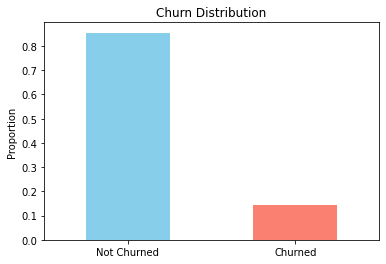

In [153]:
# Check churn value counts and plot
churn_counts = df['churn'].value_counts(normalize=True)
churn_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Churn Distribution')
plt.xticks([0, 1], ['Not Churned', 'Churned'], rotation=0)
plt.ylabel('Proportion')
plt.show()


### 4.2 Numerical Feature Distributions

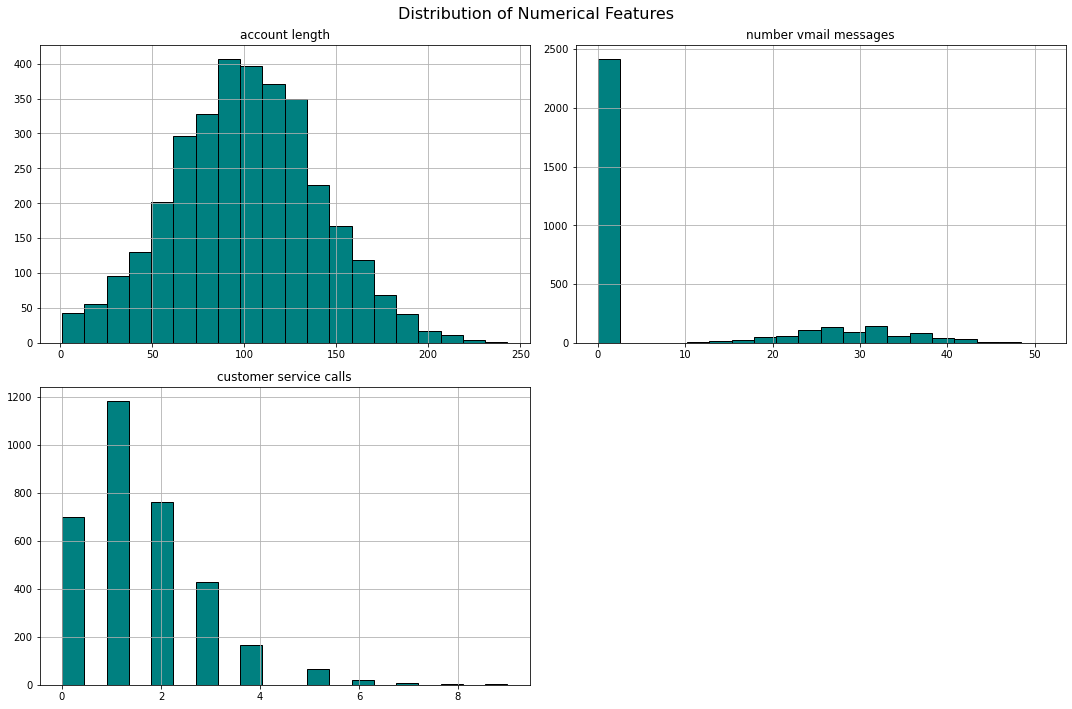

In [154]:
# Histograms for numerical features
df[numerical_features].hist(figsize=(15, 10), bins=20, color='teal', edgecolor='black')
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()


### 4.3 Categorical Feature Distributions

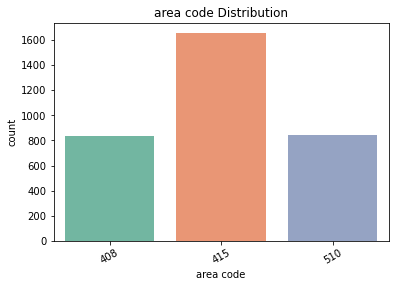

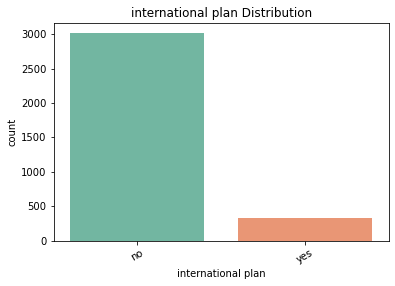

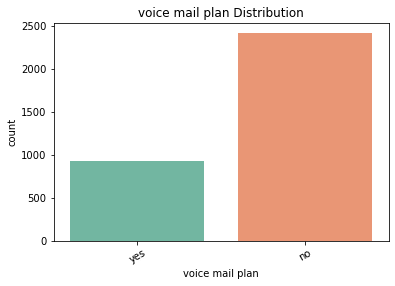

In [157]:
# Count plots for categorical features
for col in categorical_features:
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=30)
    plt.show()


### 4.4 Churn Rate by Categorical Features

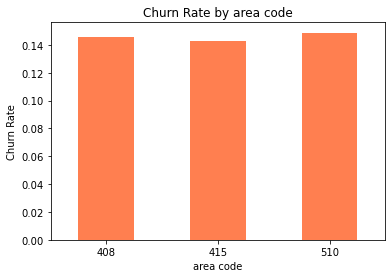

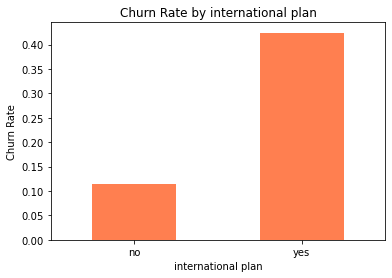

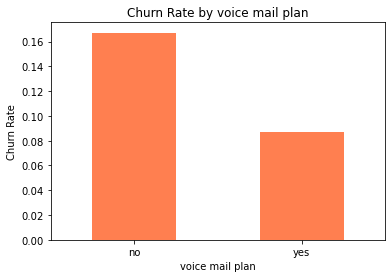

In [158]:
# Bar plots of churn rate by categorical variables
for col in categorical_features:
    churn_rate = df.groupby(col)['churn'].mean()
    churn_rate.plot(kind='bar', color='coral')
    plt.title(f'Churn Rate by {col}')
    plt.ylabel('Churn Rate')
    plt.xticks(rotation=0)
    plt.show()


### 4.5 Correlation Matrix for Numerical Features

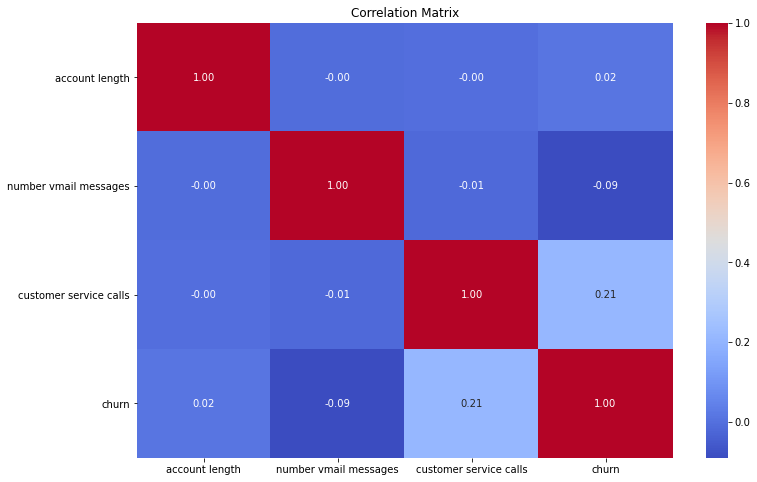

In [159]:
# Heatmap of correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_features + ['churn']].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
